Por: Nestor Andres Tabares David y Sofia Isabella Endara Chitiva

# Importación de las librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier

from pylab import rcParams

from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier

from collections import Counter

#set up graphic style in this case I am using the color scheme from xkcd.com
rcParams['figure.figsize'] = 14, 8.7 # Golden Mean
LABELS = ["Normal","Fraud"]
#col_list = ["cerulean","scarlet"]# https://xkcd.com/color/rgb/
#sns.set(style='white', font_scale=1.75, palette=sns.xkcd_palette(col_list))

%matplotlib inline

# Se importa la base de datos

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/creditcard.csv',sep=',')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Se miran los valores únicos de la variable respuesta y se separan con las características

In [4]:
df["Class"].unique()

array([0, 1])

In [5]:
Y = df['Class']
x = df.drop('Class', axis=1)

# Se estandarizan las características

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(x)



In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

#  Paso 1: Media de características por clase

In [8]:
np.set_printoptions(precision = 4)

mean_vectors = []
for cl in range(0,2):
    mean_vectors.append(np.mean(X_std[Y==cl],axis=0))
    print("Mean Vector class %s: %s\n" %(cl+1,mean_vectors[cl]))

mv1 = np.max(np.abs(mean_vectors[0]))
mv2 = np.max(np.abs(mean_vectors[1]))


pos1 = np.argmax(mean_vectors[0])
print(pos1)
pos2 = np.argmax(mean_vectors[1])
print(pos2)


Mean Vector class 1: [ 5.1261e-04  4.2159e-03 -3.7975e-03  8.0270e-03 -5.5513e-03  3.9508e-03
  1.8155e-03  7.7897e-03 -8.2678e-04  4.0656e-03  9.0221e-03 -6.4427e-03
  1.0840e-02  1.9010e-04  1.2586e-02  1.7569e-04  8.1758e-03  1.3581e-02
  4.6377e-03 -1.4469e-03 -8.3574e-04 -1.6812e-03 -3.3500e-05  1.1170e-04
  3.0038e-04 -1.3760e-04 -1.8534e-04 -7.3130e-04 -3.9669e-04 -2.3428e-04]

Mean Vector class 2: [-0.2962 -2.4363  2.1945 -4.6386  3.208  -2.2831 -1.0491 -4.5015  0.4778
 -2.3494 -5.2137  3.7231 -6.2644 -0.1099 -7.2729 -0.1015 -4.7246 -7.8483
 -2.68    0.8362  0.483   0.9715  0.0194 -0.0645 -0.1736  0.0795  0.1071
  0.4226  0.2292  0.1354]

17
11



1. **Mean Vector class 1**:
   - Cada valor en el vector corresponde a la media de la característica correspondiente en esa clase 1.
   - Estos valores nos indican cómo se distribuyen las características en la primera clase.
   - La caracteristica con mayor promedio con valor absoluto en la clase 1 es la caracteristica 17




2. **Mean Vector class 2**:
   - Estos valores nos indican cómo se distribuyen las características en la segunda clase 2.
   - La caracteristica con mayor promedio con valor absoluto en la clase 1 es la caracteristica 11

#  Paso 2 : Matriz de Dispersión dentro de las clases `S_W`

In [9]:
S_W = np.zeros((30,30))
for cl,mv in zip(range(0,2),mean_vectors):
    #Matriz de dispersión general
    #Llenando la Matriz con valores de 0 para inicializar
    class_sc_mat = np.zeros((30,30))
    #Para cada fila en nuestro conjunto de datos donde la clase corresponde a la iteración respectiva
    for row in X_std[Y == cl]:
        #Column Vectors
        #Reshaping matrices from 1x4 to 4x1 for better manipulation
        row,mv = row.reshape(30,1),mv.reshape(30,1)
        #Applying equation and making the sum
        class_sc_mat += (row-mv).dot((row-mv).T)
    #Sum the Scatter Matrices
    S_W += class_sc_mat
print(S_W)

[[ 2.8476e+05  3.3080e+04 -2.6967e+03 -1.2019e+05 -2.9511e+04  4.8959e+04
  -1.8101e+04  2.3470e+04 -1.0454e+04 -2.8096e+03  7.9587e+03 -7.0000e+04
   3.4501e+04 -1.8785e+04 -2.9188e+04 -5.2264e+04  2.7003e+03 -2.2021e+04
   2.5366e+04  8.3744e+03 -1.4416e+04  1.2883e+04  4.1032e+04  1.4556e+04
  -4.6341e+03 -6.6372e+04 -1.1777e+04 -1.4007e+03 -2.6473e+03 -2.9982e+03]
 [ 3.3080e+04  2.8188e+05  2.6350e+03 -5.5697e+03  3.8519e+03 -2.7414e+03
  -1.2597e+03 -5.4051e+03  5.7368e+02 -2.8210e+03 -6.2602e+03  4.4704e+03
  -7.5219e+03 -1.3190e+02 -8.7327e+03 -1.2191e+02 -5.6730e+03 -9.4237e+03
  -3.2180e+03  1.0040e+03  5.7990e+02  1.1665e+03  2.3245e+01 -7.7505e+01
  -2.0843e+02  9.5475e+01  1.2860e+02  5.0743e+02  2.7525e+02 -6.4690e+04]
 [-2.6967e+03  2.6350e+03  2.8243e+05  5.0169e+03 -3.4696e+03  2.4693e+03
   1.1347e+03  4.8686e+03 -5.1675e+02  2.5410e+03  5.6389e+03 -4.0267e+03
   6.7753e+03  1.1881e+02  7.8660e+03  1.0981e+02  5.1099e+03  8.4884e+03
   2.8986e+03 -9.0435e+02 -5.2234e+0

- La matriz `S_W` representa la dispersión dentro de las clases.

- La matriz `S_W` se utiliza junto con la matriz de dispersión entre las clases `S_B` para calcular las proyecciones discriminantes en LDA.

#  Paso 3 : Matriz de dispersión de las clases `S_B`

In [10]:
#We calculate the overall mean with a simple function
overall_mean = np.mean(X_std, axis = 0)

#Filling the Matrix with values of 0 to initialize
S_B = np.zeros((30,30))
#For every iteration in the mean vectors
for i,mean_vec in enumerate(mean_vectors):
    #Extracting the number of samples per class, in this case, 50
    n = X_std[Y==i,:].shape[0]
    #Reshaping matrices from 1x4 to 4x1 for better manipulation
    mean_vec = mean_vec.reshape(30,1)
    overall_mean = overall_mean.reshape(30,1)
    #Applying the equation
    S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)

print(S_B)

[[ 4.3247e+01  3.5568e+02 -3.2038e+02  6.7721e+02 -4.6834e+02  3.3332e+02
   1.5317e+02  6.5719e+02 -6.9753e+01  3.4300e+02  7.6116e+02 -5.4354e+02
   9.1457e+02  1.6038e+01  1.0618e+03  1.4822e+01  6.8976e+02  1.1458e+03
   3.9126e+02 -1.2207e+02 -7.0508e+01 -1.4183e+02 -2.8263e+00  9.4237e+00
   2.5342e+01 -1.1609e+01 -1.5636e+01 -6.1697e+01 -3.3467e+01 -1.9765e+01]
 [ 3.5568e+02  2.9253e+03 -2.6350e+03  5.5697e+03 -3.8519e+03  2.7414e+03
   1.2597e+03  5.4051e+03 -5.7368e+02  2.8210e+03  6.2602e+03 -4.4704e+03
   7.5219e+03  1.3190e+02  8.7327e+03  1.2191e+02  5.6730e+03  9.4237e+03
   3.2180e+03 -1.0040e+03 -5.7990e+02 -1.1665e+03 -2.3245e+01  7.7505e+01
   2.0843e+02 -9.5475e+01 -1.2860e+02 -5.0743e+02 -2.7525e+02 -1.6256e+02]
 [-3.2038e+02 -2.6350e+03  2.3735e+03 -5.0169e+03  3.4696e+03 -2.4693e+03
  -1.1347e+03 -4.8686e+03  5.1675e+02 -2.5410e+03 -5.6389e+03  4.0267e+03
  -6.7753e+03 -1.1881e+02 -7.8660e+03 -1.0981e+02 -5.1099e+03 -8.4884e+03
  -2.8986e+03  9.0435e+02  5.2234e+0

- La matriz `S_B` representa la dispersión entre las clases y mide cuánto se separan las medias de las clases.
- La matriz `S_B` es fundamental para calcular las proyecciones discriminantes en LDA.


# Paso 4: Vectores y valores propios

In [11]:
eigenvalues, eigenvectors = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

for i in range(len(eigenvalues)):
    eigenvectors_sc = eigenvectors[:,i].reshape(30,1)
    print("\nEigenvector {}: \n{}".format(i+1, eigenvectors_sc.real))
    print("Eigenvalue {:}: {:.2e}".format(i+1, eigenvalues[i].real))


Eigenvector 1: 
[[-9.9985e-01]
 [ 2.1488e-03]
 [-2.6949e-03]
 [ 4.3938e-03]
 [-3.0395e-03]
 [ 1.8305e-03]
 [ 1.2578e-03]
 [ 4.8169e-03]
 [-5.6980e-04]
 [ 2.2647e-03]
 [ 5.0165e-03]
 [-3.6290e-03]
 [ 6.1313e-03]
 [ 1.2115e-04]
 [ 7.1927e-03]
 [ 1.1851e-04]
 [ 4.6373e-03]
 [ 7.7283e-03]
 [ 2.6590e-03]
 [-8.8212e-04]
 [-1.2381e-04]
 [-8.5230e-04]
 [-1.0194e-04]
 [-5.7042e-05]
 [ 1.7772e-04]
 [-9.9055e-05]
 [-1.0359e-04]
 [-3.8538e-04]
 [-2.1373e-04]
 [-1.0157e-03]]
Eigenvalue 1: 0.00e+00

Eigenvector 2: 
[[-0.0069]
 [-0.1256]
 [ 0.1575]
 [-0.2568]
 [ 0.1776]
 [-0.107 ]
 [-0.0735]
 [-0.2815]
 [ 0.0333]
 [-0.1323]
 [-0.2932]
 [ 0.2121]
 [-0.3583]
 [-0.0071]
 [-0.4203]
 [-0.0069]
 [-0.271 ]
 [-0.4516]
 [-0.1554]
 [ 0.0515]
 [ 0.0072]
 [ 0.0498]
 [ 0.006 ]
 [ 0.0033]
 [-0.0104]
 [ 0.0058]
 [ 0.0061]
 [ 0.0225]
 [ 0.0125]
 [ 0.0594]]
Eigenvalue 2: 1.09e+00

Eigenvector 3: 
[[ 2.3541e-02]
 [ 4.0822e-02]
 [ 1.4216e-01]
 [ 1.5022e-02]
 [ 4.8427e-02]
 [ 1.8473e-01]
 [-4.3472e-02]
 [-5.1996e-01]
 

In [12]:
for i in range(len(eigenvalues)):
    eigv = eigenvectors[:,i].reshape(30,1)
    np.testing.assert_array_almost_equal(np.linalg.inv(S_W).dot(S_B).dot(eigv),
                                        eigenvalues[i]*eigv,
                                        decimal = 6, err_msg='', verbose=  True)
print('ok')

ok


In [13]:
#List of every eigenvector and its corresponding eigenvalue
eigen_pairs = [(np.abs(eigenvalues[i]),eigenvectors[:,i]) for i in range(len(eigenvalues))]

#Sorting in descending order
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse = True)

print("Eigenvalues in decreasing order: \n")
for i in eigen_pairs:
    print(i[0])

Eigenvalues in decreasing order: 

1.0904717087889193
8.348139831693535e-17
8.348139831693535e-17
5.3326918645252604e-17
4.4745541495467175e-17
4.4745541495467175e-17
3.22644380342842e-17
3.1364149391252074e-17
2.3918839665511487e-17
2.3918839665511487e-17
1.2974533306717239e-17
1.2974533306717239e-17
1.2341472528668314e-17
7.957118355297602e-18
7.134576384021886e-18
3.697974003042759e-18
2.723695545458698e-18
2.310028636490843e-18
2.310028636490843e-18
9.013265772208779e-19
2.4323232796254306e-19
1.2815831632219932e-19
1.2815831632219932e-19
1.2661425814301721e-19
1.2661425814301721e-19
6.458515624079437e-20
4.215119295317321e-20
2.4371509131115105e-20
2.034350876694842e-20
0.0


In [14]:
print("Variance Explained:\n")
eigenvalues_sum = sum(eigenvalues)
for i,j in enumerate(eigen_pairs):
    print("Eigenvalue {0:}: {1: .2%}".format(i+1, (j[0]/eigenvalues_sum).real))

Variance Explained:

Eigenvalue 1:  100.00%
Eigenvalue 2:  0.00%
Eigenvalue 3:  0.00%
Eigenvalue 4:  0.00%
Eigenvalue 5:  0.00%
Eigenvalue 6:  0.00%
Eigenvalue 7:  0.00%
Eigenvalue 8:  0.00%
Eigenvalue 9:  0.00%
Eigenvalue 10:  0.00%
Eigenvalue 11:  0.00%
Eigenvalue 12:  0.00%
Eigenvalue 13:  0.00%
Eigenvalue 14:  0.00%
Eigenvalue 15:  0.00%
Eigenvalue 16:  0.00%
Eigenvalue 17:  0.00%
Eigenvalue 18:  0.00%
Eigenvalue 19:  0.00%
Eigenvalue 20:  0.00%
Eigenvalue 21:  0.00%
Eigenvalue 22:  0.00%
Eigenvalue 23:  0.00%
Eigenvalue 24:  0.00%
Eigenvalue 25:  0.00%
Eigenvalue 26:  0.00%
Eigenvalue 27:  0.00%
Eigenvalue 28:  0.00%
Eigenvalue 29:  0.00%
Eigenvalue 30:  0.00%


- Primero, se calcula la matriz de dispersión dentro de las clases inversa (`S_W`) y se multiplica por la matriz de dispersión entre las clases (`S_B`).

- Se encontrar los eigenvectores y eigenvalores de esta matriz resultante. Luego se organiza de manera descendente los valores propios

- Se evidencia que el valor propio 1 explica alrededor de 100 % la base de datos con un valor de 1.09


# Paso 5: Matriz con los vectores propios de las características más relevantes

In [15]:
W = np.hstack((eigen_pairs[0][1].reshape(30,1), eigen_pairs[1][1].reshape(30,1)))
print("Matrix W:\n",W.real)

Matrix W:
 [[-6.9366e-03  2.3541e-02]
 [-1.2557e-01  4.0822e-02]
 [ 1.5748e-01  1.4216e-01]
 [-2.5676e-01  1.5022e-02]
 [ 1.7762e-01  4.8427e-02]
 [-1.0697e-01  1.8473e-01]
 [-7.3502e-02 -4.3472e-02]
 [-2.8149e-01 -5.1996e-01]
 [ 3.3298e-02  1.3145e-02]
 [-1.3235e-01  1.2799e-02]
 [-2.9315e-01  6.2258e-02]
 [ 2.1207e-01  1.5628e-01]
 [-3.5830e-01  1.8676e-01]
 [-7.0795e-03 -3.7761e-04]
 [-4.2032e-01 -2.3317e-02]
 [-6.9254e-03  1.7508e-03]
 [-2.7099e-01 -1.7621e-01]
 [-4.5162e-01  2.9890e-01]
 [-1.5538e-01 -2.9355e-02]
 [ 5.1549e-02  3.3659e-03]
 [ 7.2350e-03 -8.3111e-02]
 [ 4.9806e-02 -5.2500e-02]
 [ 5.9572e-03  2.4667e-02]
 [ 3.3334e-03  3.3336e-02]
 [-1.0386e-02 -2.4203e-03]
 [ 5.7885e-03 -2.7920e-03]
 [ 6.0535e-03  5.6511e-04]
 [ 2.2521e-02 -2.0234e-03]
 [ 1.2490e-02 -1.3263e-02]
 [ 5.9355e-02  2.9323e-01]]



- Cada columna representa un eigenvector relevante para el Análisis Discriminante Lineal (LDA).


- Los valores en la matriz **W** son los vectores propios de los 2 valores propios más alto


In [16]:
W.shape

(30, 2)

#  Paso 6 : Creación del LDA

In [17]:
X_lda = X_std.dot(W)


- **X_lda**: Es una matriz que contiene las características transformadas después de aplicar el LDA.


In [18]:
X_lda.shape

(284807, 2)

In [19]:
assert X_lda.shape == X_lda.shape

# Creación de la Grafica LDA

In [20]:
label_dict={0:"0",1:"1"}

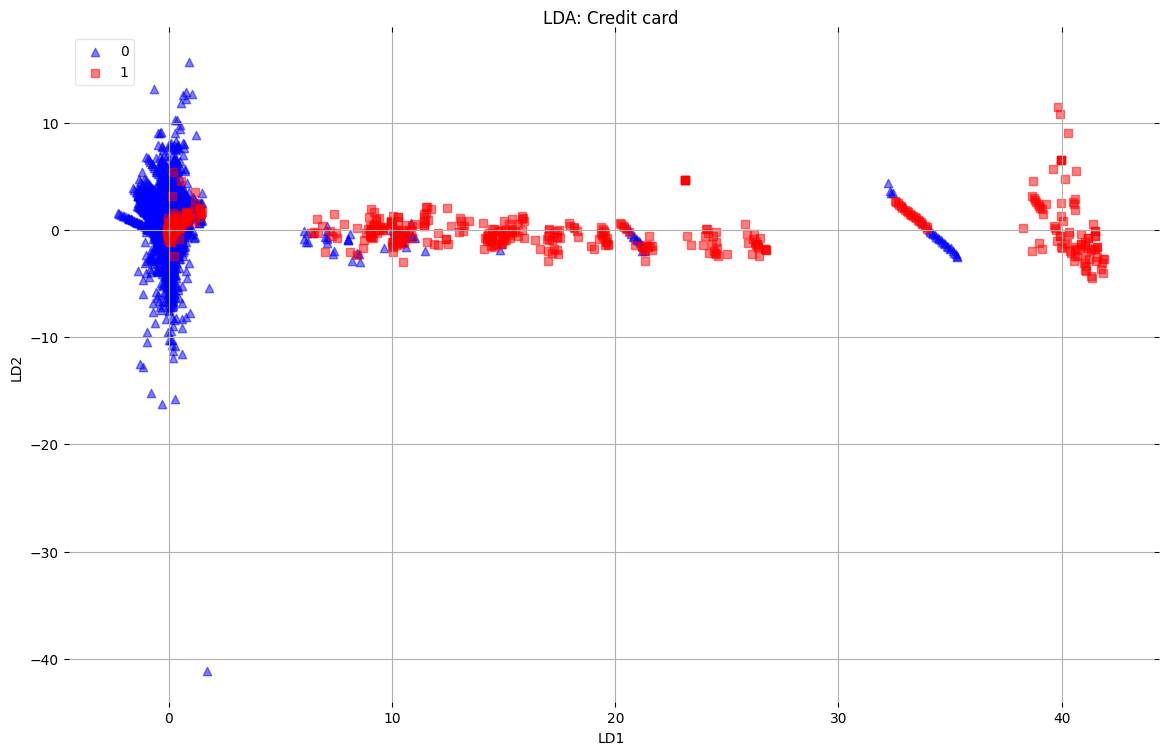

In [21]:
def plot_step_lda():
    ax = plt.subplot(111)
    for label, marker, color in zip(
    range(0,2),("^", "s", "o"),("blue","red","green")):
        plt.scatter(x = X_lda[:,0].real[Y == label],
                   y= X_lda[:,1].real[Y ==label],
                   marker = marker,
                   color = color,
                   alpha = 0.5,
                   label = label_dict[label])
    plt.xlabel("LD1")
    plt.ylabel("LD2")

    leg = plt.legend(loc = "upper left", fancybox = True)
    leg.get_frame().set_alpha(0.5)
    plt.title("LDA: Credit card")

    plt.tick_params(axis="both", which = "both", bottom = "off", top = "off",
                   labelbottom = "on", left = "off", right = "off", labelleft = "on")

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)

    plt.grid()
    plt.tight_layout
    plt.show()

plot_step_lda()

- **Separación de Clases**: La separación entre las clases es visible, hay una separación notable en el  gráfico

- **Direcciones Discriminantes**: Los ejes LD1 y LD2 representan las dos primeras direcciones discriminantes. LD1 parece ser más efectivo para separar las clases, ya que los cuadrados rojos se extienden más a lo largo de este eje.
- **Distribución de Datos**: Los triángulos azules están más agrupados, mientras que los cuadrados rojos están más dispersos, lo que podría indicar diferencias en la variabilidad de las características entre las clases.


# Creación de matriz de confusión

In [22]:
def mostrar_resultados(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(8, 8))
    sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(y_test, pred_y))

# Creación de modelo de clasificación ( Regresión Logistica)

In [23]:
def run_modell1(X_train, y_train):
    clf_base = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg")
    clf_base.fit(X_train, y_train)
    return clf_base

# Utilizando un modelo de clasificación con LDA

In [24]:
X_train_std, X_test_std, y_train, y_test = train_test_split(np.real(X_lda), Y, test_size=0.2, random_state=42)
modelo = run_modell1(X_train_std, y_train)

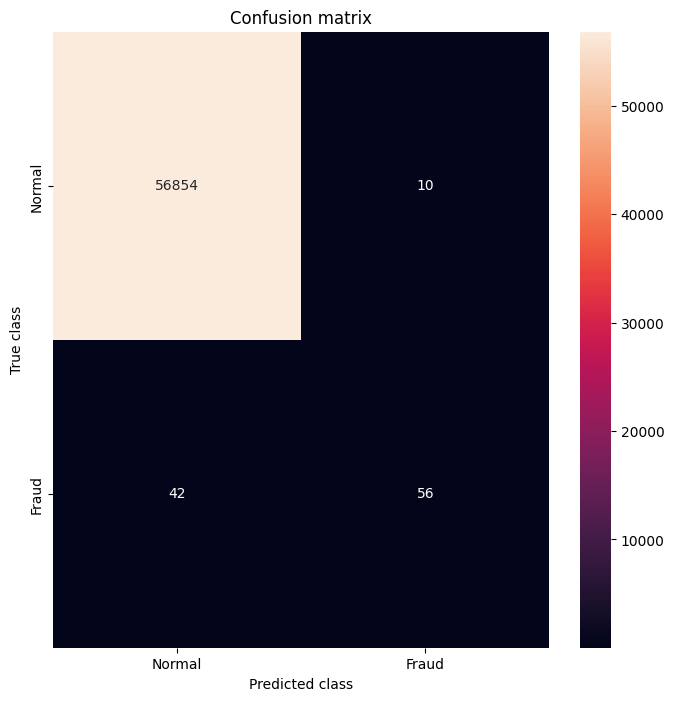

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.57      0.68        98

    accuracy                           1.00     56962
   macro avg       0.92      0.79      0.84     56962
weighted avg       1.00      1.00      1.00     56962



In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

pred_y = modelo.predict(X_test_std)

accuracy1 = accuracy_score(y_test, pred_y)

precision1 = precision_score(y_test, pred_y)

recall1 = recall_score(y_test, pred_y)

f1_1 = f1_score(y_test, pred_y)

mostrar_resultados(y_test, pred_y)




- **Alta Precisión en Normal**: El modelo es extremadamente preciso al identificar transacciones normales, con una precisión y un recall de 1.00.

- **Desempeño en Fraude** : Aunque la precisión es relativamente alta 0.85, el recall de 0.57 para el fraude indica que el modelo no está capturando todas las instancias de fraude.

- **F1-Score para Fraude**: El F1-score de 0.68 sugiere que hay un equilibrio entre la precisión y el recall, pero aún hay espacio para mejorar la detección de fraudes.


# Creación de la función LDA

In [26]:
#creamos una función que crea el modelo que usaremos cada vez
def run_model(x, Y):


    np.set_printoptions(precision = 4)

    mean_vectors = []

    for cl in range(0,2):
        mean_vectors.append(np.mean(x[Y==cl],axis=0))

    S_W = np.zeros((30,30))
    for cl,mv in zip(range(0,2),mean_vectors):

        class_sc_mat = np.zeros((30,30))

        for row in x[Y == cl]:

            row,mv = row.reshape(30,1),mv.reshape(30,1)
            #Applying equation and making the sum
            class_sc_mat += (row-mv).dot((row-mv).T)
        #Sum the Scatter Matrices
        S_W += class_sc_mat


        #We calculate the overall mean with a simple function
    overall_mean = np.mean(x, axis = 0)
    #Filling the Matrix with values of 0 to initialize
    S_B = np.zeros((30,30))
    #For every iteration in the mean vectors
    for i,mean_vec in enumerate(mean_vectors):
        #Extracting the number of samples per class, in this case, 50
        n = x[Y==i,:].shape[0]
        #Reshaping matrices from 1x4 to 4x1 for better manipulation
        mean_vec = mean_vec.reshape(30,1)
        overall_mean = overall_mean.reshape(30,1)
        #Applying the equation
        S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)


    eigenvalues, eigenvectors = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

    for i in range(len(eigenvalues)):
        eigenvectors_sc = eigenvectors[:,i].reshape(30,1)

    for i in range(len(eigenvalues)):
      eigv = eigenvectors[:,i].reshape(30,1)
      np.testing.assert_array_almost_equal(np.linalg.inv(S_W).dot(S_B).dot(eigv),
                                          eigenvalues[i]*eigv,
                                          decimal = 6, err_msg='', verbose=  True)
    print('ok')

        #List of every eigenvector and its corresponding eigenvalue
    eigen_pairs = [(np.abs(eigenvalues[i]),eigenvectors[:,i]) for i in range(len(eigenvalues))]

    #Sorting in descending order
    eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse = True)


    W = np.hstack((eigen_pairs[0][1].reshape(30,1), eigen_pairs[1][1].reshape(30,1)))

    X_lda = x.dot(W)
    assert X_lda.shape == X_lda.shape, "The matrix is not 150x2 dimensional"

    ax = plt.subplot(111)
    for label, marker, color in zip(
    range(0,2),("^", "s", "o"),("blue","red","green")):
        plt.scatter(x = X_lda[:,0].real[Y == label],
                   y= X_lda[:,1].real[Y ==label],
                   marker = marker,
                   color = color,
                   alpha = 0.5,
                   label = label_dict[label])
    plt.xlabel("LD1")
    plt.ylabel("LD2")

    leg = plt.legend(loc = "upper left", fancybox = True)
    leg.get_frame().set_alpha(0.5)
    plt.title("LDA: Credit card")

    plt.tick_params(axis="both", which = "both", bottom = "off", top = "off",
                   labelbottom = "on", left = "off", right = "off", labelleft = "on")

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)

    plt.grid()
    plt.tight_layout
    plt.show()



    return np.real(X_lda)

In [27]:

pip install scikit-learn==0.18 --force-reinstall


  Using cached scikit-learn-0.18.tar.gz (8.9 MB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for scikit-learn
  Running setup.py clean for scikit-learn
Failed to build scikit-learn
ERROR: Could not build wheels for scikit-learn, which is required to install pyproject.toml-based projects


In [28]:
from imblearn.under_sampling import NearMiss
import imblearn
print(imblearn.__version__)

0.10.1


# NearMiss para base de datos desbalanceados utilizando modelo de clasificación con LDA

Distribution of class labels before resampling Counter({0: 284315, 1: 492})
Distribution of class labels after resampling Counter({0: 492, 1: 492})
ok


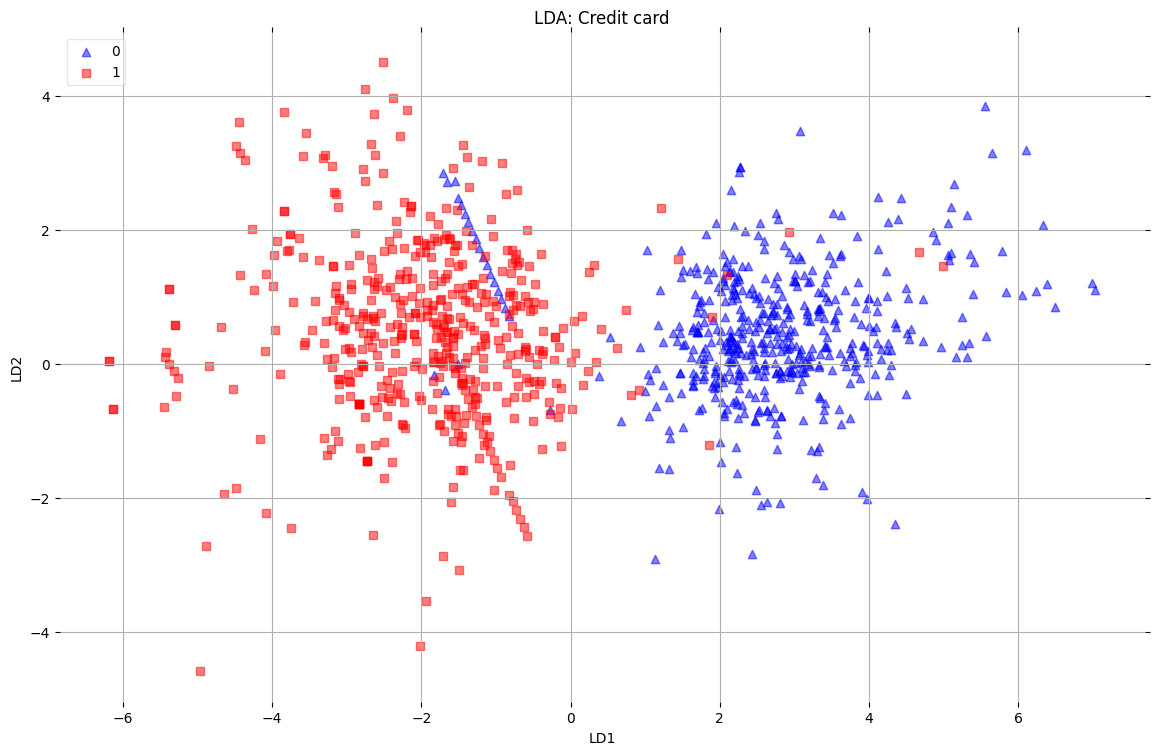

In [29]:
from collections import Counter
from imblearn.under_sampling import NearMiss

us = NearMiss(sampling_strategy="auto", n_neighbors=3, version=2, n_jobs= -1)
X_train_res, y_train_res = us.fit_resample(X_std, Y)

print ("Distribution of class labels before resampling {}".format(Counter(Y)))
print ("Distribution of class labels after resampling {}".format(Counter(y_train_res)))


X_train_std, X_test_std, y_train, y_test = train_test_split(run_model(X_train_res, y_train_res), y_train_res, test_size=0.2, random_state=42)

modelo1 = run_modell1(X_train_std, y_train)





- **Separación de Clases**: La separación entre las clases es notable en el gráfico.
- **Direcciones Discriminantes**: El LD1 parece ser más efectivo para separar las clases, ya que los cuadrados rojos como los triangulos azules se pueden separar el LD1.
- **Distribución de Datos**: Los triángulos azules están más agrupados, mientras que los cuadrados rojos están más dispersos, lo que podría indicar diferencias en la variabilidad de las características entre las clases.


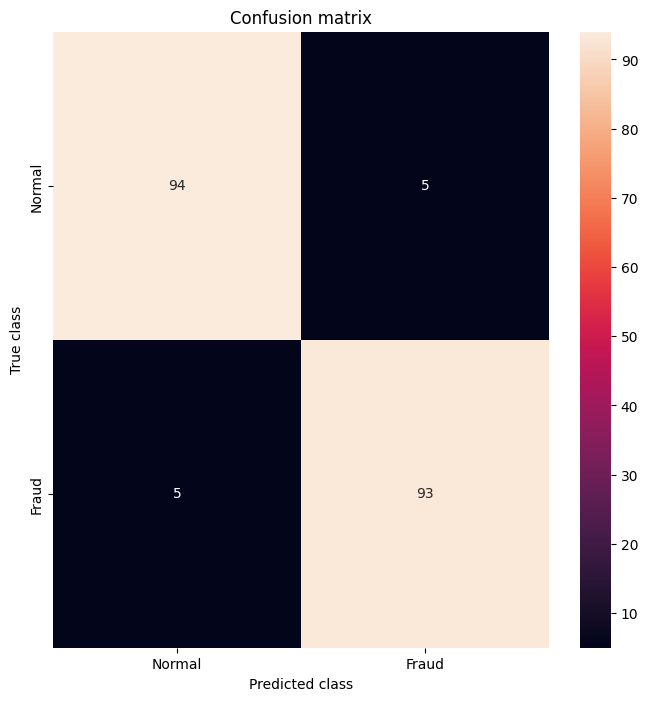

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        99
           1       0.95      0.95      0.95        98

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197



In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

pred_y = modelo1.predict(X_test_std)

accuracy2 = accuracy_score(y_test, pred_y)

precision2 = precision_score(y_test, pred_y)

recall2 = recall_score(y_test, pred_y)

f1_2 = f1_score(y_test, pred_y)

mostrar_resultados(y_test, pred_y)

- **Precisión**: La precisión es del 95% para ambas clases, lo que indica que el modelo es muy preciso al identificar transacciones normales y fraudulentas.
- **Recall**: El recall también es del 95% para ambas clases, lo que significa que el modelo es capaz de detectar la mayoría de las instancias reales de cada clase.
- **F1-Score**: Un F1-score del 95% para ambas clases sugiere un excelente equilibrio entre la precisión y el recall, lo cual es ideal en un modelo de clasificación.
- **Exactitud**: La exactitud general del modelo es del 95%, lo que refleja un alto nivel de precisión en las predicciones.

Estos resultados indican que el modelo es altamente efectivo y equilibrado.

# RandomOverSampler para base de datos desbalanceados utilizando modelo de clasificación con LDA

Distribution of class labels before resampling Counter({0: 284315, 1: 492})
Distribution of class labels after resampling Counter({0: 284315, 1: 284315})
ok


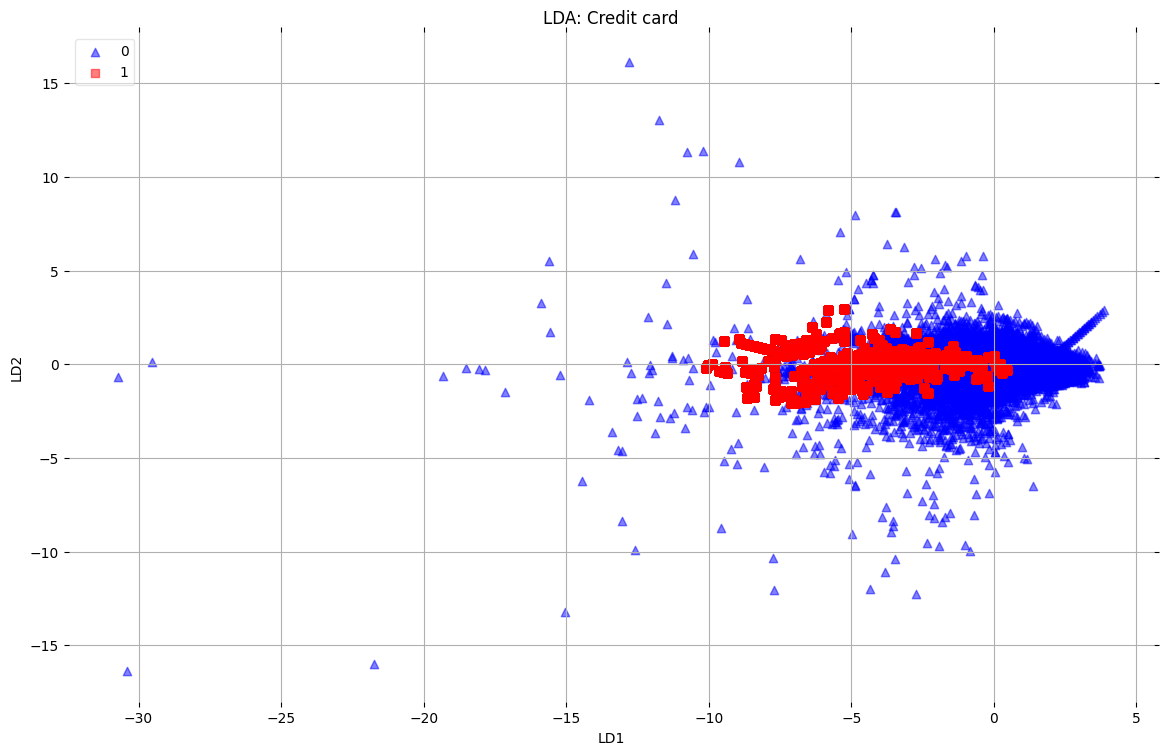

In [31]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

os = RandomOverSampler(sampling_strategy="auto", random_state=42)
X_train_res, y_train_res = os.fit_resample(X_std, Y)

print ("Distribution of class labels before resampling {}".format(Counter(Y)))
print ("Distribution of class labels after resampling {}".format(Counter(y_train_res)))

X_train_std, X_test_std, y_train, y_test = train_test_split(run_model(X_train_res, y_train_res), y_train_res, test_size=0.2, random_state=42)

modelo2 = run_modell1(X_train_std, y_train)

- **Separación de Clases**: La separación entre las clases es visibles; sin embargo no hay una separación notable en el gráfico.
- **Direcciones Discriminantes**: El LD1 parece ser más efectivo para separar las clases, ya que los cuadrados rojos como los triangulos azules se pueden separar el LD1.
- **Distribución de Datos**: Los cuadrados rojos están más agrupados, mientras que los triangulos azules están más dispersos, lo que podría indicar diferencias en la variabilidad de las características entre las clases.

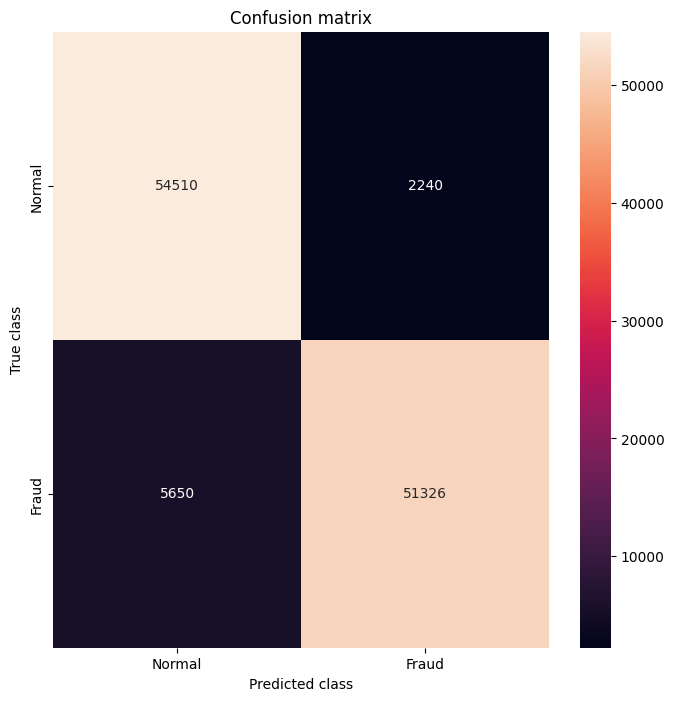

              precision    recall  f1-score   support

           0       0.91      0.96      0.93     56750
           1       0.96      0.90      0.93     56976

    accuracy                           0.93    113726
   macro avg       0.93      0.93      0.93    113726
weighted avg       0.93      0.93      0.93    113726



In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

pred_y = modelo2.predict(X_test_std)

accuracy3 = accuracy_score(y_test, pred_y)

precision3 = precision_score(y_test, pred_y)

recall3 = recall_score(y_test, pred_y)

f1_3 = f1_score(y_test, pred_y)

mostrar_resultados(y_test, pred_y)

- **Precisión**: La precisión es alta para ambas clases, con un 0.91 para la clase '0' y un 0.96 para la clase '1', lo que indica que el modelo es preciso al identificar transacciones normales y fraudulentas.

- **Recall**: El recall también es alto, con un 0.96 para la clase '0' y un 0.90 para la clase '1', lo que significa que el modelo es capaz de detectar la mayoría de las instancias reales de cada clase.

- **F1-Score**: Un F1-score de 0.93 para ambas clases sugiere un excelente equilibrio entre la precisión y el recall, lo cual es ideal en un modelo de clasificación.

- **Exactitud**: La exactitud general del modelo es del 93%, lo que refleja un alto nivel de precisión en las predicciones.


# Conclusiones

In [33]:
df = pd.DataFrame({'algorithm' : ['LDA',  'NearMiss',
                                  'Random Oversampling'],
                   "Accuracy" : [accuracy1,accuracy2,accuracy3],
                   'precision' : [precision1, precision2, precision3],
                   'recall' : [recall1,recall2, recall3],
                   "F1":[f1_1,f1_2,f1_3]})

df['overall'] = df.apply(lambda row: (row.precision + row.recall+row.Accuracy+row.F1)/4, axis=1)

df = df.sort_values(['overall'], ascending=False)
df

,algorithm,Accuracy,precision,recall,F1,overall
1,NearMiss,0.949239,0.948980,0.948980,0.948980,0.949044
2,Random Oversampling,0.930623,0.958182,0.900835,0.928624,0.929566
0,LDA,0.999087,0.848485,0.571429,0.682927,0.775482


- NearMiss Subsampling se clasifica como el algoritmo de mejor rendimiento según estas métricas.

- Random Oversampling se clasifica en segundo lugar.

- LDA se clasifica en tercer lugar y tiene puntuaciones notablemente más bajas en precisión y recall en comparación con NearMiss Subsampling y Random Oversampling.

Esta clasificación sugiere que para este conjunto de datos, NearMiss Subsampling podría ser preferible debido a su mayor rendimiento promedio en precisión, recall, F1 y exactitud.